## COG403: Problem 1 of Problem Set 3: Cross-linguistic Color Representations

### The 2 problems for Problem Set 3 are Due 29 Nov. 2018, 2 pm

In this problem, you'll create a "crosslinguistic semantic space" for color, as in the Beekhuizen & Stevenson (2018) paper, and explore some of its properties.  You'll be using the World Color Survey (WCS) data, which is freely available at https://www1.icsi.berkeley.edu/wcs/data.html.  (Note: We provide all the data you need here, as indicated below, but you might want to explore or read further on the website.)

**For each part of this problem, you'll find a "to do" list, and cells below it that indicate where to insert your code or text answer.  The cells are labeled "Part x.n", where x is the problem part (a, b, c, etc) and n is the numbered item from the to-do list (1, 2, etc) -- eg, "Part a.3".**

**If, for any answer, you want to run additional code to support your answer, create a new code cell and state in a comment the name (Part x.n) of the answer cell that refers to it.**

In [168]:
# The library colormath is used in some functions in provided_functions.py.
# You do not need to call it, but you need to run this cell in order
# to be able to import functions from provided_functions.py.

!pip install colormath

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### (a)  Create a color-chip x color-term matrix from the WCS data

The first step in creating a crosslinguistic semantic space in the domain of color is to generate a color-chip by color-term matrix of color term counts across the 110 languages of the WCS.  This data can be found in `data/term.txt`.

The columns of `data/term.txt` indicate (in this order):
 * Language Number: one of 110 different languages
 * Speaker Number: a label for each informant; not used in this problem
 * Chip Number: one of 330 chips in the Munsell Color Chart
 * Color Term Abbreviation: the color term given for that chip by that speaker
 
Notes regarding the processing of `data/term.txt`:

* Skip rows that have '\*' as the term abbreviation; this represents that the speaker did not give an answer.

* The term abbreviations are per-language and are not unique. This means that for each term, you need to keep track of (language_number, term_abbreviation) pairs. An easy way to do this is to concatenate the Language Number with the Term Abbreviation.

**To do for Part a:**

1. Write `generate_chip_by_term_matrix` according to the docstring below.  To help you in checking your code, we have provided one of the columns of the resulting matrix -- the column for the term 'GB' in language 1 -- in the file `data/wcs_lang1.txt`.  Please ensure your code is correct by checking that the column in your matrix matches this data, before moving on to further steps.

2. Access your matrix to print how many times the PR label for language 49 is used to describe color chip 7.

3. Access your matrix to find a list of languages (by language number) that can use the same color term for chips 197 and 308. Print the number of languages found, followed by the list in sorted order.

In [169]:
# Part a.1: Write and call generate_chip_by_term_matrix.
#           Check your code by comparing the column of your matrix for
#           language 1, term GB against the column provided in 
#           'data/wcs_lang1.txt'.
#           

from collections import defaultdict, Counter
import numpy as np
from provided_functions import write_matrix, load_matrix

N_CHIPS = 330


def normalize(matrix):
    """
    matrix: 2-d np.array -- matrix to normalize
    
    Return a normalized version of matrix, where each row has been divided
    by the sum for that row.
    """
    for i in range(len(matrix)):
        if np.sum(matrix[i, :]) != 0:
            matrix[i, :] = matrix[i, :] / np.sum(matrix[i, :])
    return matrix


def generate_chip_by_term_matrix(output_file, input_file, n_chip):
    """
    output_file: str -- the path to write the chip by term matrix to
    input_file: str -- path of the term file (like 'data/term.txt')
    n_chip: int -- number of chips in the input file
    
    Generate a normalized chip-by-term matrix and write the output to output_file.
    To do this you should:
    1. Create the matrix from input_file and then normalize it using the function
        provided above before writing it. Your chip-by-term matrix should have one
        row for each of the 330 chips (note that the row for chip 1 should be at
        index 0). Each column should correspond to a particular term in a particular
        language. Before normalization, cells in the matrix indicate the number of
        times a particular term (column) was used to describe a chip (row).
    2. Generate a list of term_labels, such that 
        len(term_labels) == chip_by_term_matrix.shape[1]. The term labels indicate
        the language and term that each column is associated with (i.e., you should
        have as many column labels as you have different terms across all languages.)
        In order for the term labels to be unique, you need to concatenate the 
        language number with the term code (e.g. '1-GB' for language number 1 with
        term code 'GB').
    3. Call write_matrix defined in provided_functions.py, with the normalized 
        chip-by-term-matrix and term_labels from steps 1 and 2 as arguments.
    
    """
    #This is my reference for index that the columns in the matrix will correspond to.
    term_labels = [] 
    
    #In the for loop I counted the number of times a specific term in a particular language occurs for a colour chip.
    #Format is {"chip_number": Counter({"language_number-term_number": int_of_count})}
    dict_counter = defaultdict(Counter)
    
    with open(input_file, "r") as file:
        for row in file:
            row_split = row.split()
            if row_split[3] != "*":
                dict_counter[row_split[2]][row_split[0]+"-"+row_split[3]] += 1
                if (row_split[0]+"-"+row_split[3]) not in term_labels:
                    term_labels.append(row_split[0]+"-"+row_split[3])               
    #Using the nested Counter in dictionary generated, 
    #then transfers the values into a 2-D matrix of N_CHIPS*len(terms_vector), 
    #where the index corresponds to terms_vector list.
    chip_by_term_matrix = np.zeros((n_chip, len(term_labels)))
    for chip, counter in dict_counter.items():
        for term in counter:
            chip_by_term_matrix[(int(chip))-1, term_labels.index(term)] = counter[term]
    #normalized this matrix and then used provided function to write in the matrix into the output_file.
    normalized_matrix = normalize(chip_by_term_matrix)
    write_matrix(output_file, normalized_matrix, term_labels)
matrix_file = 'data/chip_by_term_wcs.tsv'
generate_chip_by_term_matrix(matrix_file, 'data/term.txt', N_CHIPS)

In [170]:
# Part a.2: Write and call code to print the answer to question 2 here.
matrix_file = 'data/chip_by_term_wcs.tsv'
matrix, labels = load_matrix(matrix_file)
def access_counts(matrix, labels, term, language_number, chip_number):
    """
    matrix: 2-D matrix -- rows correspond to the colour chips (330) and columns correspond to column-
    labels: list -- where each element is a column label in the matrix.
    term: str or int -- the term used to describe
    language_number: str or int -- the language number of a given language
    chip_number: str(of int) or int -- the chip_number associated with a colour chip
    
    Returns number of times a term in a given language is used to describe a given colour chip within
    the chip_by_term_matrix generated in 3.1.a.1.
    """
    
    term = str(term)
    language_number = str(language_number)
    chip_number = int(chip_number)
    corresponding_label = language_number + "-" + term
    
    #Finds the lowest non-zero probability that occurs for this chip_number
    lowest_non_zero = 1
    for i in range(len(matrix[chip_number-1])):
        if matrix[chip_number-1][i] != 0 and matrix[chip_number-1][i] < lowest_non_zero:
            lowest_non_zero = matrix[chip_number-1][i]
    
    #Reverse normalizes these probabilities to find a value where all the probabilities in 
    #the row of corresponding chip_number turn into full integer.
    #So depending on many times the lowest probability occurs for a term in a given language,
    #while loop iterates until the true number is found.
    possible_result = matrix[chip_number-1][labels.index(corresponding_label)]
    i = 1
    reverse_normalize = True
    while reverse_normalize:
        multiplier = i/lowest_non_zero
        works = True
        for label in matrix[chip_number-1]:
            if (label*multiplier)%1 != 0:
                works = False
        if works is True:
            possible_result = matrix[chip_number-1][labels.index(corresponding_label)]*multiplier
            reverse_normalize = False
        i += 1
    return (possible_result, matrix[chip_number-1][labels.index(corresponding_label)])
number, prob = access_counts(matrix, labels, "PR", 49, 7)
print ("The number of times 'PR' in language 49 is used "+
       "to describe colour chip 7 is: \n" + str(number)
      + "\nand the probability is: \n" + str(prob))

The number of times 'PR' in language 49 is used to describe colour chip 7 is: 
273.0
and the probability is: 
0.008187134502923977


In [171]:
# Part a.3: Write and call code to print the answer to question 3 here.
matrix_file = 'data/chip_by_term_wcs.tsv'
matrix, labels = load_matrix(matrix_file)
import re
from functools import reduce
def find_languages(matrix, labels, chip_numbers):
    """
    matrix: 2-D matrix -- rows correspond to the colour chips (330) and columns correspond to column-
    labels: list -- where each element is a column label in the matrix.
    chip_numbers: list of int -- of chip colors to query languages that use the same terms
    
    Return a tuple (int, list) where the int corresponds to the number of languages 
    that use the same terms to reference chip_numbers, and lists them in sorted order.
    """
    #First retrieve the row that the chip_numbers correspond
    chip_dict = defaultdict()
    for chip in chip_numbers:
        chip_dict[chip] = matrix[chip-1]
    #Appends language-term of elements in the row if they occur at least once (probability > 0)
    check_dict = defaultdict()
    for chip in chip_dict:
        check_dict[chip] = []
        for i in range(len(chip_dict[chip])):
            if chip_dict[chip][i] > 0:
                check_dict[chip].append(labels[i])
    #Takes the intersection of the chip lists in order to find languages that use the same terms for
    #the given chips (2 or more chips)
    master_list = list(reduce(set.intersection, [set(check_dict[chip]) for chip in check_dict]))
    languages = []
    #Consolidates the languages found in the intersection, sorts the list in increasing order
    for element in master_list:
        language_term = element.split("-")
        if language_term[0] not in languages:
            languages.append(language_term[0])
    languages.sort(key=int)
    #Returns number of languages, and lists them.
    return (len(languages), languages)
        
number_of_languages, languages = find_languages(matrix, labels, [197, 308]) 
print ("The number of languages that use the same colour term for colour chips 197 and 308 is: \n" + 
       str(number_of_languages) + "\nand the languages are: \n" + str(languages))

The number of languages that use the same colour term for colour chips 197 and 308 is: 
109
and the languages are: 
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110']


### (b)  Create a color-chip x color-chip distance matrix

We'd like to be able to compare the crosslinguistic semantic space represented by the `chip_by_term_wcs` matrix from part (a) to a perceptual semantic space.  Since each semantic space will have different dimensionality, we need to transform each space to one based on **relative distances** between the color chips.  As in the B&S paper, you'll compare all pairs of color-chip vectors in the `chip_by_term_wcs` matrix to create a color-chip x color-chip distance matrix.

To accomplish this, write a function `generate_distance_matrix`. Given any 2D matrix, your function should return a matrix of distances between the rows of the input matrix.

For example, for the example matrix:

[[1, 1], [1, 2], [4, 5]]

there are three rows:

 * Row 1: [1, 1]
 * Row 2: [1, 2]
 * Row 3: [4, 5]

For this input, you need to generate a matrix containing the distances between each pair of rows, yielding the following (where each row is [dist_from_row_1, dist_from_row_2, dist_from_row_3]):
```
 [[0.00, 1.00, 5.00]
  [1.00, 0.00, 4.24]
  [5.00, 4.24, 0.00]]
```

**To do for Part b:**

1. Write `generate_distance_matrix` according to the docstring.

2. Call your function on `test_case` defined below (same as the example above), and print your result.

3. Call your function on the chip x term matrix you generated in part a.  To check your code, verify that the first row of the resulting distance matrix matches the array in `data/wcs_dist_mat_chip1.txt` before going on to subsequent steps.  Print the distance between chips 197 and 308.

In [172]:
# Part b.1: Write generate_distance_matrix

from scipy.spatial.distance import euclidean
import numpy as np


def generate_distance_matrix(matrix):
    """
    matrix: 2d np.array -- matrix to use to generate distance matrix
    
    Return a distance matrix between the rows of matrix. Write your code
    according to the specifications above.
    """
    colour_chip_by_colour_chip_matrix = np.zeros(((len(matrix)), len(matrix)))
    for row_i in range(len(matrix)):
        for row_j in range(len(matrix)):
            colour_chip_by_colour_chip_matrix[row_i][row_j] = euclidean(matrix[row_i], matrix[row_j])
    return colour_chip_by_colour_chip_matrix

In [173]:
# Part b.2: Print the answer to question 2.
#           Check your answer against the answer above before continuing.
test_case = np.array([[1, 1], [1, 2], [4, 5]])
print (generate_distance_matrix(test_case))

[[0.         1.         5.        ]
 [1.         0.         4.24264069]
 [5.         4.24264069 0.        ]]


In [174]:
# Part b.3: Write and call code to print the answer to question 3.
matrix_file = 'data/chip_by_term_wcs.tsv'
matrix, labels = load_matrix(matrix_file)
distance_matrix = generate_distance_matrix(matrix)
print ("The distance between chips 197 and 308 is:\n"
      +str(distance_matrix[197-1][308-1]))

The distance between chips 197 and 308 is:
0.02246834786490477


### (c)  Compare chip x chip distance matrices across spaces

We'll compare the crosslinguistic space to a perceptual space given by L\*a\*b\* coordinates. The L\*a\*b\* space is a color space with three dimensions: L\* represents lightness, a\* represents the spectrum from green to red, and b\* represents the spectrum from blue to yellow. This space was cognitively motivated, and was designed such that the distance between two points in the L\*a\*b\* space is correlated with human perceived differences (rather than with physical properties of the colors). For more information on the L\*a\*b\* space, see [this description](https://en.wikipedia.org/wiki/CIELAB_color_space).

The L\*a\*b\* values of the color chips are stored in `data/perceptual_color_mat.tsv` (a color chip x L\*a\*b\* features matrix).

**To do for Part c:**

1. Call the function `generate_distance_matrix` on the matrix `data/perceptual_color_mat.tsv`.

2. Call `generate_distance_matrix` on the chip x term matrix that you created in part (a).

3. Calculate Pearson r and its associated p value on these two matrices, and print the results.

4. What does the result of the Pearson test tell you about the relation between the crosslinguistic semantic space and the perceptual space?  For example, is the crosslinguistic space nearly identical to the perceptual space, completely different, or in between?  What do you think this says about the relation between color term systems and human perception of color?

In [175]:
# Part c.1: Call code to create the perceptual distance matrix
perceptual_matrix_file = 'data/perceptual_color_mat.tsv'
perceptual_matrix, perceptual_labels = load_matrix(perceptual_matrix_file)
perceptual_distance_matrix = generate_distance_matrix(perceptual_matrix)

In [176]:
# Part c.2: Call code to create the WCS distance matrix
matrix_file = 'data/chip_by_term_wcs.tsv'
matrix, labels = load_matrix(matrix_file)
distance_matrix = generate_distance_matrix(matrix)

In [177]:
# Part c.3: Calculate pearsonr and print results on the above two matrices
# (Hint: you should call np.array.flatten(), since pearsonr only works 
# on one-dimensional arrays)
from scipy.stats.stats import pearsonr
flat_perceptual = perceptual_distance_matrix.flatten()
flat_distance = distance_matrix.flatten()
r_squared, p_value = pearsonr(flat_perceptual, flat_distance)
print ("The R^2 coefficient of determinant obtained from the pearsonr "+
       "score is: " + str(r_squared) + ", while the p value is: " + str(p_value) + ".")

The R^2 coefficient of determinant obtained from the pearsonr score is: 0.6220727896251244, while the p value is: 0.0.


**Part c.4:** Enter answer to question 4 here. (No more than 150 words.)

Given the results of the Pearson test, we can say that the relationship between the crosslinguistic semantic space and the perceptual space has a strength of association equal to $R^2 = .622~$. The p-value obtained is most likely not completely zero, however, given by the float 0.0 we can say that it is very small, and very close to zero. 

This means at practically any level of significance (99.999%) we may reject the null hypothesis and conclude that the alternative hypothesis is True such that the correlation is not affected by chance alone. 

In this sense, given $R^2 = .622$ the crosslinguistic space is not necessarily identical to perceptual space, however it is estimated that they strongly correlated. 

As for color term systems and human perception of color, we may equivocate the findings of the semantic and perceptual space pearson score to say that color term systems do affect human perception of color at a statistically significant level. However, I believe further hypothesis testing is recommended to strengthen this claim.

### (d) Compare the full semantic space to different language families

Here you'll create semantic spaces from various language families of the WCS, and explore the range of variation they show when compared to the full crosslinguistic space created from the entire WCS data.

**To do for Part d:**

1. Modify your `generate_chip_by_term_matrix` function from part (a) to be restricted to languages passed in through the `lang_filter` parameter. To do this, copy over your code from part (a) and modify it.  This function will be called by the function you write next.

2. Write a function `evaluate_language_family_correlations` according to the docstring below. This function will compare distance matrices for various language families with the distance matrix based on the full WCS data (which you computed in part (c)), and will print a summary for each language family.  Call `evaluate_language_family_correlations` on `'data/term.txt'` and `'data/language_families.tsv'`.

3. What do you think influences the degree of correlation between the full semantic space and ones created from a single language family?  Discuss the impact of the number of languages.

In [178]:
# Part d.1: Copy and modify your `generate_chip_by_term_matrix` function
#           from part (a) to be restricted to languages passed in through 
#           the `lang_filter` parameter.


def generate_chip_by_term_matrix(output_file, input_file, n_chip, lang_filter=None):
    """
    output_file: str -- the path to write the chip by term matrix to
    input_file: str -- path of the term file (like 'data/term.txt')
    n_chip: int -- number of chips in the input file
    lang_filter: list of int -- numbers indicating languages to use for generating
        the chip by term matrix. A table mapping language numbers to language
        info can be found in 'data/language_families.tsv'.
    
    Generate a normalized chip-by-term matrix and write the output to output_file.
    To do this you should:
    1. Create the matrix from input_file and then normalize it using the function
        provided above before writing it. Your chip-by-term matrix should have one
        row for each of the 330 chips (note that the row for chip 1 should be at
        index 0). Each column should correspond to a particular term in a particular
        language. Before normalization, cells in the matrix indicate the number of
        times a particular term (column) was used to describe a chip (row).
    2. Generate a list of term_labels, such that 
        len(term_labels) == chip_by_term_matrix.shape[1]. The term labels indicate
        the language and term that each column is associated with (i.e., you should
        have as many column labels as you have different terms across all languages.)
        In order for the term labels to be unique, you need to concatenate the 
        language number with the term code (e.g. '1-GB' for language number 1 with
        term code 'GB').
    3. Call write_matrix defined in provided_functions.py, with the normalized 
        chip-by-term-matrix and term_labels from steps 1 and 2 as arguments.
    
    """
    term_labels = [] 
    dict_counter = defaultdict(Counter)
    
    with open(input_file, "r") as file:
        for row in file:
            row_split = row.split()
            
            #Filter applied in the if condition here
            if (row_split[3] != "*"): 
                if (lang_filter is None) or (row_split[0] in lang_filter):
                    dict_counter[row_split[2]][row_split[0]+"-"+row_split[3]] += 1
                    if (row_split[0]+"-"+row_split[3]) not in term_labels:
                        term_labels.append(row_split[0]+"-"+row_split[3])
                        
    chip_by_term_matrix = np.zeros((n_chip, len(term_labels)))
    for chip, counter in dict_counter.items():
        for term in counter:
            chip_by_term_matrix[(int(chip))-1, term_labels.index(term)] = counter[term]
    normalized_matrix = normalize(chip_by_term_matrix)
    write_matrix(output_file, normalized_matrix, term_labels)

In [179]:
# Part d.2: Write the function `evaluate_language_family_correlations`.
#           You may find it faster to debug your code with a higher
#           min_members value than the default of 5.  But please turn
#           in a call to your code using the default of 5, and base your 
#           answer to part d.3 on that call.

from collections import defaultdict
from scipy.stats import pearsonr

from provided_functions import load_matrix


def get_language_families(family_file, min_members=5):
    """
    family_file: str -- path to file containing mapping between language number
        and language family.
    min_members: int -- minimum number of languages that must occur in a family
        for the family to be included in the result.
    
    Return a dict mapping str to list of int, mapping the names of language
    families to the language numbers of languages in that family.
    """
    result = defaultdict(list)
    with open(family_file) as f:
        next(f)  # skip headers
        for line in f:
            line = line.strip().split('\t')
            lang_id = line[0]
            lang_fam = line[-1]
            if lang_fam == 'Isolate':
                continue
            result[lang_fam].append(lang_id)
    
    result_filtered = {}
    for fam, langs in result.items():
        if len(langs) >= min_members:
            result_filtered[fam] = langs
    return result_filtered


def evaluate_language_family_correlations(
        term_file, family_file, min_members=5):
    """
    term_file: str -- path to term file (like 'data/term.txt')
    family_file: str -- path to language family file (like 'data/language_families.tsv')
    
    This function should: 
        1. Generate a distance matrix based on all terms for all languages in term_file.
        2. Call get_language_families on family_file to get groupings of language ids
        3. Generate a chip by term matrix for each language family returned by 
            get_language_families. Save each matrix in a file called
            data/chip_matrix_wcs_X.tsv where X is the name of the language family.
        4. For each language family, compute the pearson correlation between the 
            distance matrix for that language family and the distance matrix for 
            the full WCS. (Hint: you should call np.array.flatten(), since pearsonr
            only works on one-dimensional arrays.)
        5. Print the name of each language family, the number of languages it contains,
            and the correlation r and p value between the distance matrix for that 
            language family and the distance matrix for the full WCS.
    """
    #1
    generate_chip_by_term_matrix('data/chip_by_term_wcs.tsv', term_file, 330)
    matrix, labels = load_matrix('data/chip_by_term_wcs.tsv')
    distance_matrix = generate_distance_matrix(matrix)
    
    flat_distance = distance_matrix.flatten()
    #2
    language_fam = get_language_families(family_file, min_members)
    
    for k in language_fam:
        #3
        output_path = "data/chip_matrix_wcs_"+str(k)+".tsv"
        generate_chip_by_term_matrix(output_path, term_file, 330, language_fam[k])
        #4
        fam_mat, fam_lab = load_matrix(output_path)
        fam_distance_matrix = generate_distance_matrix(fam_mat)
        flat_fam = fam_distance_matrix.flatten()
        r, p_value = pearsonr(flat_fam, flat_distance)
        #5
        print ("For "+str(k)+" with the languages:" + str(language_fam[k]) + 
               ", the R^2 coefficient of determinant obtained from the pearsonr "+
               "score is: " + str(r) + ", while the p value is: " + str(p_value) + ".\n\n")
        
    
evaluate_language_family_correlations(
    'data/term.txt', 'data/language_families.tsv')

For Trans-New Guinea with the languages:['2', '6', '8', '13', '51', '52', '63', '69', '83', '90', '97'], the R^2 coefficient of determinant obtained from the pearsonr score is: 0.9615356953842729, while the p value is: 0.0.


For Indo-European with the languages:['15', '24', '34', '44', '55', '57', '65', '84', '101'], the R^2 coefficient of determinant obtained from the pearsonr score is: 0.9477328451515699, while the p value is: 0.0.


For Austronesian with the languages:['3', '47', '48', '49', '81', '89', '94', '106'], the R^2 coefficient of determinant obtained from the pearsonr score is: 0.9720906282655644, while the p value is: 0.0.


For Niger-Congo with the languages:['1', '14', '28', '35', '36', '43', '56', '62', '77', '100', '104', '105'], the R^2 coefficient of determinant obtained from the pearsonr score is: 0.87239508166894, while the p value is: 0.0.


For Chibchan with the languages:['16', '29', '42', '59', '82', '95'], the R^2 coefficient of determinant obtained from the

**Part d.3:** Input the answer to question 3 here.  (No more than 150 words.)

In referencing Beekhuizen and Stevenson's paper on week 9, I think that the vairation of categorizations of colour terms used in the languages within the language families influences the degree of correlation between the full semantic space and ones created from a single language family.

Families with lower $R^2$ scores than others appear to encapsulate languages that have categories for non-derived basic colours that vary more widely in the colour terms they use versus the full semantic space.
For example, Indo-European languages use categorization in basic colour terms that are more similar to the full semantic space than the Niger-Congo family language, and thus is reflected in the pearsonr score.

The actual impact of the number of languages, however, does not appear to have an obvious effect on the correlation/coefficient of determinant. In taking into consideration my claim, however, I may admit that if the number of languages that have more similar colour terms with the full semantic space increase within the language families, I hypothesize that the degree of correlation will increase as well.

Reference citation: 

Sections from Beekhuizen and Stevenson, 2018: Section 1 (p. 1–4), Section 3.1–3.2 (p. 7–11), Section 5 (p. 21–27).  “More Than the Eye Can See: A Computational Model of Color Term Acquisition and Color Discrimination”  Cognitive Science, online publication.

### (e)  Examine the first few principal components from PCA

An interesting finding related to the semantics of colors is that there are evolutionary patterns in color term adoption. More specifically, as a language adds terms to make distinctions between colors, there are some commonalities between the types of splits that occur. For example, most languages that have only two color terms have labels that refer to white/red/yellow and black/green/blue. When a third color term is added, typically white splits off from red/yellow. The diagram below shows known paths of color evolution in language.

In this question, you'll analyze whether the cross-linguistic data and/or perceptual data are predictive of the paths of color evolution.  To do so, you'll use Principal Component Analysis (PCA). This is a **dimensionality reduction** technique that can be used to transform a high dimensional space (such as the color x term matrix) into a lower N dimensional space.  For example, when calling PCA with N=5 on the chip x term matrix for the WCS, the resulting matrix will have 330 rows by 5 columns (5 extracted dimensions) instead of 330 rows by `len(term_labels)` columns.

PCA works by iteratively extracting the dimensions of the data with the highest variance, up to the number of dimensions N specified. Because the dimensions with the highest variance are extracted first in PCA, we can consider the extracted dimensions as the N most important dimensions in defining the original space.

We can then compare the N dimensions from PCA -- for N=1, N=2, etc. -- to the evolution of color terms to see if 1 dimension captures the white/red/yellow vs. black/green/blue split, and if 2 dimensions capture the next split (eg, of yellow from red), etc.  That is, we want to see whether the single most important dimension in the data captures the white/red/yellow vs. black/green/blue split.  Similarly, if we have the 2 most important dimensions, we see if they capture the white vs. red/yellow vs. black/green/blue splits.  And again, if we have the 3 most important dimensions, we see whether they reflect one of the subsequent splits in the evolutionary diagram below.

We can do this by finding the extremes in the PCA space, which can be thought of as the most conceptually salient extremes. After projecting a high dimensional chip-by-term matrix to a lower N-dimensional space, we can find extreme points in that PCA space. We define extreme points as points that have a maximum or minimum value along a given axis. For example, for one dimension (N=1), there are two extremes: the minimum and maximum points. For two dimensions (N=2), there are at most four extremes: minimum and maximum for the x axis, and minimum and maximum for the y axis.  We can analyze the colors that these extreme points map to, for N=1 to N=5, to test whether the most salient aspects of the data reflect the evolutionary salience of various colors.

**To do for part e**:

 1. Write the function `identify_extreme_points` according to the docstring below.
 
 2. Call the code in cell **WCS PCA Analysis** and answer the following in cell Part e.2 based on the results:  Explain whether the PCA analysis of the semantic space based on the WCS suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.
 
 3. Call the code in cell **Perceptual PCA Analysis** and answer the following in cell Part e.3 based on the results:  Explain whether the PCA analysis of the perceptual space suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.  What do you think underlies the differences between the findings here and in part e.2?
 
 4. Call the code in cell **Niger-Congo PCA Analysis** and answer the following in cell Part e.4 based on the results:  Explain whether the PCA analysis of the semantic space based on the Niger-Congo language family suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.  What do you think underlies the differences between between the findings here and in part e.2?  You might also want to refer back to your findings in part (d).
 
**NOTE: There is only one truly black chip in the 330 chips.  When you're considering a mapping to the evolutionary diagram, you might find that you have to consider another very dark color as possibly corresponding to black.  The plots we generate for you should help you to see this.**


W=white; R=red; Y=yellow; Bk=black; G=green; Bu=blue
![Alt text](https://notebooks.azure.com/cog403/libraries/in-progress-3-1/raw/color_evolution_Kay_Cook_2009.png)


In [180]:
# Part e.1: Write the function `identify_extreme_points` according to the
#           docstring below.

from collections import Counter
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

from provided_functions import load_matrix


def get_english_chip_labels():
    """
    Return a list of str, where every index contains an English label
    for one of the 330 Munsell Color Chips. Note that chip 1 will be
    at index 0.
    """
    chip_to_label = {}
    with open('data/chip_en_labels.txt', 'r') as f:
        for line in f:
            line = line.strip('\n').split('\t')
            chip_to_label[int(line[0])] = line[-1]
    return [chip_to_label[i + 1] for i in range(len(chip_to_label))]


def get_extreme_point_color(matrix, point, n_neighbors=10):
    """
    matrix: a 2D np.array -- matrix to use to compute nearest neighbors
    point: a list of float -- point to compute nearest neighbors of
    
    Compute the 10 nearest neighbors of point in matrix. Then find the most
    common English label from among these points.
    """
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(matrix)
    english_labels = get_english_chip_labels()
    distances, indices = nbrs.kneighbors([point])
    indices = indices[0]
    # no need to add index back in because it was found
    color_label_counter = Counter([english_labels[i] for i in indices])
    best_label = color_label_counter.most_common(1)[0]
    return best_label
        

def identify_extreme_points(matrix, n_neighbors=10):
    """
    matrix: a 2D np.array
    n_neighbors: int -- the number of neighbors to use to generate the color
        labels (pass this to get_extreme _point_color)
    
    Print a summary of extreme points in matrix.
        1. Detect extreme points by selecting the points with min and max values
            for each dimension (two points per dimension).
        2. Filter the detected extreme points by removing one point for each pair
            of points that is closer to each other than they are to the mean point.
        3. On a single line, and in this order: Print the color label of each 
            extreme point (get a label for each point
            using the function get_extreme_point_color defined above), and the
            percent of neighbors that have this color. Also print the coordinates
            of the extreme point to 2 decimal places.
    """
    #1
    extreme_chips = []
    extreme_points = []
    mean_point = 0
    for dimension in range(len(matrix[0])):
        minimum = 1
        maximum = -1
        min_chip = 0
        max_chip = 0
        for chip in range(len(matrix)):
            if matrix[chip][dimension] < minimum:
                minimum = matrix[chip][dimension]
                min_chip = chip
            if matrix[chip][dimension] > maximum:
                maximum = matrix[chip][dimension]
                max_chip = chip
        if min_chip not in extreme_chips:
            extreme_chips.append(min_chip)
        if max_chip not in extreme_chips:
            extreme_chips.append(max_chip)
    for chips in extreme_chips:
        point = []
        for dimension in range(len(matrix[0])):
            point.append(matrix[chips][dimension])
        extreme_points.append(point)
    avg_point = []
    for dimension in range(len(matrix[0])):
        avg_point.append(np.mean(matrix[:, dimension]))
    #2
    for i in extreme_points:
        for j in extreme_points:
            if i != j:
                distance = euclidean(i , j)
                avg_dist = euclidean(avg_point, i)
                if avg_dist > distance:
                    extreme_points.remove(j)
    #3
    result = ""
    for extreme in extreme_points:
        color, percent = get_extreme_point_color(matrix, extreme, n_neighbors=10)
        coordinate = []
        percent = percent * 10
        for coord in extreme:
            coordinate.append(round(coord, 2))
        result += ("Colour: "+str(color) +", Percent of neighbours: " + str(percent) +"%, Coordinates: " + str(coordinate) + ".\n")
    print (result)

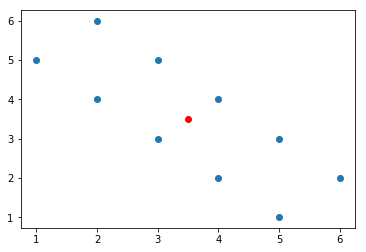

In [181]:
# Example for part e.1

import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1, 5], [2, 4], [3, 3], [4, 2], [5, 1],
                   [2, 6], [3, 5], [4, 4], [5, 3], [6, 2]])

### Generate plot of points from array above (blue) and mean point (red).
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(np.mean(points[:, 0]), np.mean(points[:, 1]), color='r')
plt.show()

### Step 1: Candidate extreme points should be the list below:
candidates = [[1, 5], [2, 6], [5, 1], [6, 2]]

### Step 2: Filter extreme points
# [1, 5] and [2, 6] are closer to each other than they are to the mean point
# [5, 1] and [6, 2] are closer to each other than they are to the mean point

# There are four possible results, all of which will be considered correct.
# (Note that order does not matter, so different orderings of the following
# are also correct):
# 1. [[1, 5], [5, 1]]
# 2. [[1, 5], [6, 2]]
# 3. [[2, 6], [5, 1]]
# 4. [[2, 6], [6, 2]]

# Note: The function identify_extreme_points does not return anything, and the
# nearest neighbors do not apply to this list. This means that you should print
# or inspect intermediate results in identify_extreme_points, rather than
# comparing the function's results to the possible results above directly.

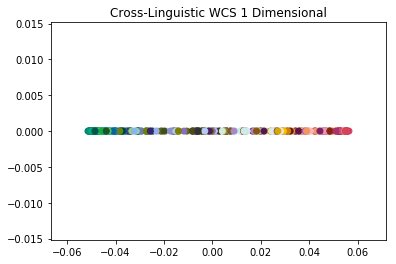

Colour: green, Percent of neighbours: 100%, Coordinates: [-0.05].
Colour: red, Percent of neighbours: 60%, Coordinates: [0.06].



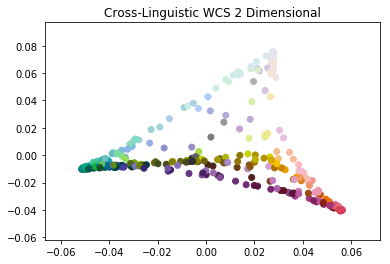

Colour: green, Percent of neighbours: 100%, Coordinates: [-0.05, -0.01].
Colour: red, Percent of neighbours: 60%, Coordinates: [0.06, -0.04].
Colour: white, Percent of neighbours: 60%, Coordinates: [0.03, 0.08].



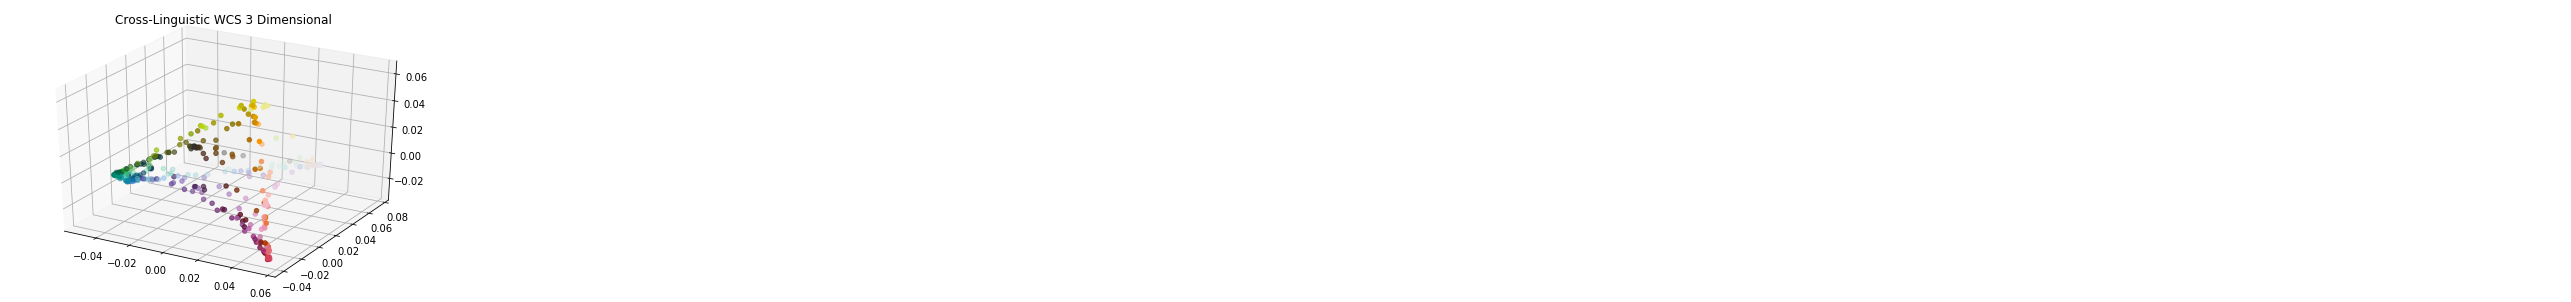

Colour: green, Percent of neighbours: 100%, Coordinates: [-0.05, -0.01, -0.01].
Colour: red, Percent of neighbours: 60%, Coordinates: [0.06, -0.04, -0.03].
Colour: white, Percent of neighbours: 60%, Coordinates: [0.03, 0.08, -0.01].
Colour: yellow, Percent of neighbours: 80%, Coordinates: [0.03, -0.0, 0.06].


Cross-Linguistic WCS 4 Dimensional
Colour: green, Percent of neighbours: 100%, Coordinates: [-0.05, -0.01, -0.01, -0.02].
Colour: red, Percent of neighbours: 60%, Coordinates: [0.06, -0.04, -0.03, -0.01].
Colour: white, Percent of neighbours: 60%, Coordinates: [0.03, 0.08, -0.01, 0.0].
Colour: yellow, Percent of neighbours: 80%, Coordinates: [0.03, -0.0, 0.06, -0.03].
Colour: brown, Percent of neighbours: 70%, Coordinates: [-0.01, -0.0, 0.02, 0.07].


Cross-Linguistic WCS 5 Dimensional
Colour: green, Percent of neighbours: 100%, Coordinates: [-0.05, -0.01, -0.01, -0.02, -0.02].
Colour: red, Percent of neighbours: 60%, Coordinates: [0.06, -0.04, -0.03, -0.01, -0.01].
Colour: white

In [182]:
# WCS PCA Analysis:  Call this code to answer part e.2

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR WCS DATA

matrix_file = 'data/chip_by_term_wcs.tsv'
chip_by_term_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 1 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=2)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 2 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=3)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 3 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic WCS 4 Dimensional")
pca = PCA(n_components=4)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic WCS 5 Dimensional")
pca = PCA(n_components=5)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

**Part e.2:** Input the answer to part e.2 here. (No more than 200 words.)

For these results in e.2, we can see that the PCA analysis of the semantic space based on the WCS suggests a match to one of the evolutionary pathways in the diagram.

Particularly, we can see it evolve with
[red, green] -> [white, red, green] -> [white, red, green, yellow] (top-most evolution in III in the diagram) -> [white, red, yellow, green, brown] (top-most and middle-path evolution in IV in the diagram, where brown = black) -> [white, red, yellow, green, blue, brown] (where brown = black)

Here, since brown is also a dark colour, brown is being used in placement of black in the colour evolution diagram.

As the number of dimensions increase, so does the further delineation of basic colours increase, and the semantic space based on the WCS does indeed reflect an evolutionary pathway in the diagram.

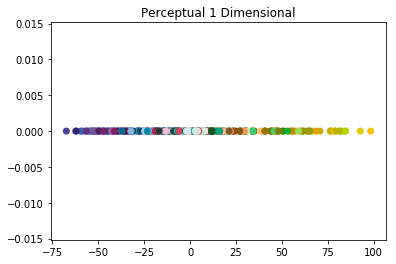

Colour: blue, Percent of neighbours: 70%, Coordinates: [-67.38].
Colour: yellow, Percent of neighbours: 50%, Coordinates: [98.32].



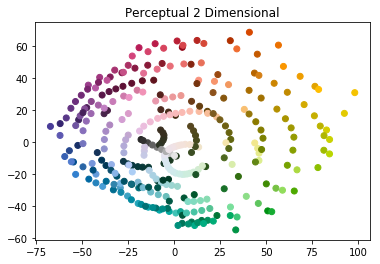

Colour: purple, Percent of neighbours: 60%, Coordinates: [-67.38, 9.64].
Colour: yellow, Percent of neighbours: 70%, Coordinates: [98.32, 30.78].
Colour: green, Percent of neighbours: 100%, Coordinates: [33.51, -55.11].



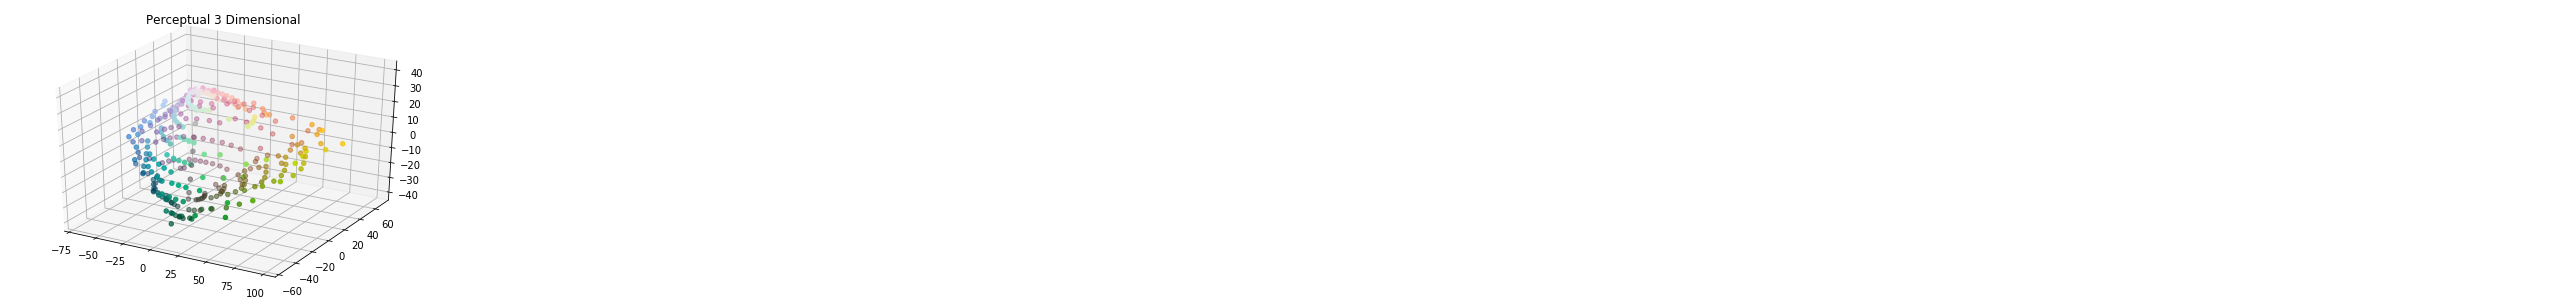

Colour: purple, Percent of neighbours: 60%, Coordinates: [-67.38, 9.64, -8.24].
Colour: yellow, Percent of neighbours: 80%, Coordinates: [98.32, 30.78, 5.79].
Colour: green, Percent of neighbours: 100%, Coordinates: [33.51, -55.11, -20.95].
Colour: grey, Percent of neighbours: 50%, Coordinates: [1.38, -9.38, 39.72].



In [183]:
# Perceptual PCA Analysis:  Call this code to answer part e.3

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR PERCEPTUAL DATA

matrix_file = 'data/perceptual_color_mat.tsv'
perceptual_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 1 Dimensional")
identify_extreme_points(perc_pca)

pca = PCA(n_components=2)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 2 Dimensional")
identify_extreme_points(perc_pca)

pca = PCA(n_components=3)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 3 Dimensional")
identify_extreme_points(perc_pca)

**Part e.3:** Input the answer to part e.3 here. (No more than 200 words.)

In examining the results in e.3, the PCA analysis of the perceptual space does not appear to suggest a match to one of the evolutionary pathways in the diagram.

An underlying reason for such disparity between the findings here and in e.2 may be because the data does not capture relevant crosslinguistic biases that go beyond colour perception. For this reason, linguistic relativity behaviour is not taken into consideration in these results, thus the iterative ordinance of dimensions fail to reflect an evolutionary pathway in the diagram.


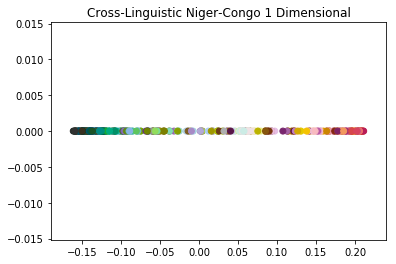

Colour: brown, Percent of neighbours: 40%, Coordinates: [-0.16].
Colour: pink, Percent of neighbours: 40%, Coordinates: [0.21].



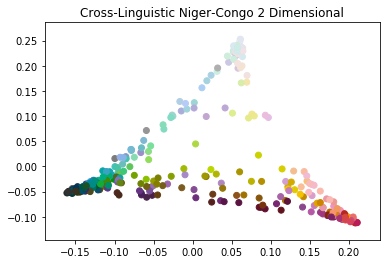

Colour: brown, Percent of neighbours: 40%, Coordinates: [-0.16, -0.05].
Colour: red, Percent of neighbours: 40%, Coordinates: [0.21, -0.11].
Colour: white, Percent of neighbours: 40%, Coordinates: [0.06, 0.25].



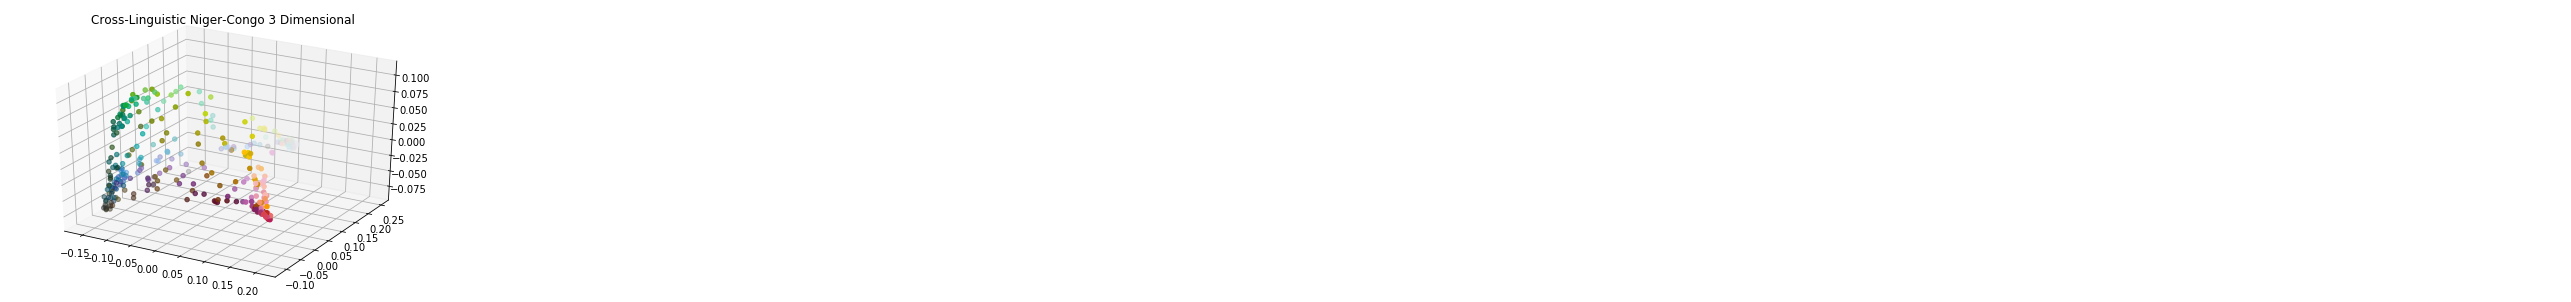

Colour: brown, Percent of neighbours: 50%, Coordinates: [-0.16, -0.05, -0.08].
Colour: red, Percent of neighbours: 40%, Coordinates: [0.21, -0.11, -0.02].
Colour: white, Percent of neighbours: 50%, Coordinates: [0.06, 0.25, -0.03].
Colour: green, Percent of neighbours: 100%, Coordinates: [-0.07, -0.02, 0.11].


Cross-Linguistic Niger-Congo 4 Dimensional
Colour: brown, Percent of neighbours: 50%, Coordinates: [-0.16, -0.05, -0.08, 0.01].
Colour: red, Percent of neighbours: 40%, Coordinates: [0.21, -0.11, -0.02, -0.05].
Colour: white, Percent of neighbours: 50%, Coordinates: [0.06, 0.25, -0.03, -0.03].
Colour: green, Percent of neighbours: 100%, Coordinates: [-0.07, -0.02, 0.11, -0.02].
Colour: yellow, Percent of neighbours: 90%, Coordinates: [0.11, -0.0, 0.06, 0.12].


Cross-Linguistic Niger-Congo 5 Dimensional
Colour: brown, Percent of neighbours: 60%, Coordinates: [-0.16, -0.05, -0.08, 0.01, -0.06].
Colour: red, Percent of neighbours: 40%, Coordinates: [0.21, -0.11, -0.02, -0.05, 0.01

In [184]:
# Niger-Congo PCA Analysis:  Call this code to answer part e.4

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR NIGER-CONGO DATA

matrix_file = 'data/chip_matrix_wcs_Niger-Congo.tsv'
chip_by_term_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 1 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=2)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 2 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=3)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 3 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic Niger-Congo 4 Dimensional")
pca = PCA(n_components=4)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic Niger-Congo 5 Dimensional")
pca = PCA(n_components=5)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

**Part e.4:** Input the answer to part e.4 here. (No more than 200 words.)

In examining thse results, we can see that the PCA analysis of the semantic space based on the Niger-Congo language family suggests a match to one evolutionary pathway in the diagram.

Particularly, we can see it evolve with
[pink, brown] (where pink = red, and brown = black) -> [white, red, brown] (where brown = black)  -> [white, red, green, brown] (middle-path evolution in III in the diagram, where brown = black) -> [white, red, yellow, green, brown] (middle-path evolution in IV in the diagram, where brown = black) -> [white, red, yellow, green, blue, brown] (where brown = black)

The underlying difference between the findings in e.2 and here is that the evolutionary pathway of colour varies, where at stage III e.2 takes on the top-path, while here it takes on the middle-path, and at stage IV e.2 takes on either top-path or middle-path, while here it merely takes on the middle-path.

In referencing my findings in part (d), it does reflect my hypothesis that language families with lower correlation scores with the full semantic space will vary more widely in colour terms used, and here it shows that by difference of evolutionary pathway, and the colour terms used in the early stages (e.g. (pink, brown) instead of (red, green)).